### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:
key = 'abdd1551911cf8c3084fbe68a780b8e809f057c5'

In [89]:
import pandas_datareader as pdr

In [90]:
df = pdr.get_data_tiingo('TSLA'  , api_key=key)

<ipython-input-90-55f420332d98>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('TSLA'  , api_key=key)


In [91]:
df.to_csv('TSLA.csv')

In [92]:
import pandas as pd

In [93]:
df= pd.read_csv('TSLA.csv')

In [94]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2019-02-07 00:00:00+00:00,307.51,314.7000,303.0000,313.300,6520611,20.500667,20.980000,20.200000,20.886667,97809165,0.0,1.0
1,TSLA,2019-02-08 00:00:00+00:00,305.80,307.4500,298.5000,306.830,5844212,20.386667,20.496667,19.900000,20.455333,87663180,0.0,1.0
2,TSLA,2019-02-11 00:00:00+00:00,312.84,318.6000,310.5000,311.600,7129713,20.856000,21.240000,20.700000,20.773333,106945695,0.0,1.0
3,TSLA,2019-02-12 00:00:00+00:00,311.81,318.1900,309.6200,316.200,5517570,20.787333,21.212667,20.641333,21.080000,82763550,0.0,1.0
4,TSLA,2019-02-13 00:00:00+00:00,308.17,312.7500,305.5700,312.350,5141617,20.544667,20.850000,20.371333,20.823333,77124255,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,TSLA,2024-01-30 00:00:00+00:00,191.59,196.3593,190.6100,195.330,109982327,191.590000,196.359300,190.610000,195.330000,109982327,0.0,1.0
1253,TSLA,2024-01-31 00:00:00+00:00,187.29,193.9700,185.8459,186.995,103221430,187.290000,193.970000,185.845900,186.995000,103221430,0.0,1.0
1254,TSLA,2024-02-01 00:00:00+00:00,188.86,189.8800,184.2800,188.500,91843275,188.860000,189.880000,184.280000,188.500000,91843275,0.0,1.0
1255,TSLA,2024-02-02 00:00:00+00:00,187.91,188.6900,182.0000,185.040,110612672,187.910000,188.690000,182.000000,185.040000,110612672,0.0,1.0


In [95]:
df1= df.reset_index()['close']

In [96]:
df1

0       307.51
1       305.80
2       312.84
3       311.81
4       308.17
         ...  
1252    191.59
1253    187.29
1254    188.86
1255    187.91
1256    181.06
Name: close, Length: 1257, dtype: float64

In [97]:
df1.shape

(1257,)

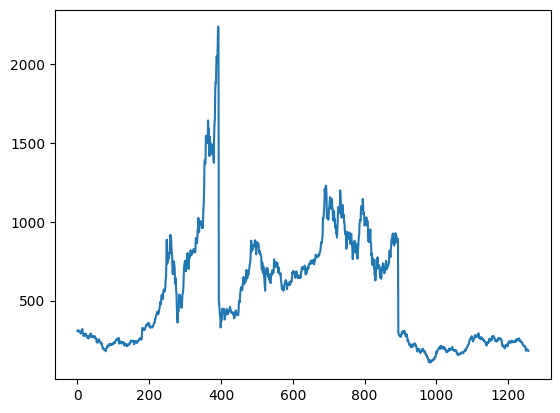

In [98]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [99]:
# by using Minmax scaler we are transforming value between 0 to 1

import numpy as np

In [100]:
from sklearn.preprocessing  import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1) )

In [101]:
df1

array([[0.09359116],
       [0.09278859],
       [0.09609274],
       ...,
       [0.03790393],
       [0.03745805],
       [0.03424307]])

#### whenever you are dealing with time series data , we should try to divide in different way , bcoz in time series the next data is always depende on previous data

In [102]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)   # 65% for trainign
test_size=len(df1)-training_size      # remain 35% for testing


train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [103]:
training_size,test_size

(817, 440)

In [104]:

train_data


array([[0.09359116],
       [0.09278859],
       [0.09609274],
       [0.09560932],
       [0.09390092],
       [0.09183582],
       [0.09376481],
       [0.09271349],
       [0.09126792],
       [0.0859503 ],
       [0.0875836 ],
       [0.08948912],
       [0.08906202],
       [0.09698449],
       [0.0993969 ],
       [0.08762115],
       [0.08319527],
       [0.07905569],
       [0.07891489],
       [0.07907915],
       [0.08262267],
       [0.0858048 ],
       [0.08225659],
       [0.08488489],
       [0.08535423],
       [0.07853472],
       [0.07574684],
       [0.07479877],
       [0.07767583],
       [0.07787295],
       [0.07341891],
       [0.07148992],
       [0.07493957],
       [0.07825312],
       [0.08003192],
       [0.0806139 ],
       [0.08498815],
       [0.08343933],
       [0.08622251],
       [0.07494427],
       [0.07831413],
       [0.07748809],
       [0.07707038],
       [0.0788304 ],
       [0.07524464],
       [0.07490672],
       [0.07428719],
       [0.077

In [105]:
test_data

array([[0.35912984],
       [0.35554878],
       [0.31868679],
       [0.32475536],
       [0.29376012],
       [0.29094408],
       [0.31046394],
       [0.28924037],
       [0.30671861],
       [0.28240678],
       [0.28222373],
       [0.26085936],
       [0.26602211],
       [0.24408514],
       [0.25846573],
       [0.28143055],
       [0.30578931],
       [0.30514632],
       [0.29674982],
       [0.31300307],
       [0.27946871],
       [0.28476756],
       [0.28562176],
       [0.28981766],
       [0.28677634],
       [0.27624903],
       [0.25302607],
       [0.26028207],
       [0.27733321],
       [0.24931359],
       [0.25446695],
       [0.28301692],
       [0.2816793 ],
       [0.28024781],
       [0.29522446],
       [0.29411682],
       [0.27685917],
       [0.27098303],
       [0.26532748],
       [0.26925586],
       [0.27742708],
       [0.27554971],
       [0.29358646],
       [0.30234436],
       [0.27922465],
       [0.27743177],
       [0.28302161],
       [0.284

In [106]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [107]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [108]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# before sending to Lstm we are reshaping it in 3 dimension

In [109]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [110]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [111]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 10s 290ms/step - loss: 0.0314 - val_loss: 0.0030
Epoch 2/50
12/12 [==============================] - 2s 178ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 3/50
12/12 [==============================] - 2s 179ms/step - loss: 0.0102 - val_loss: 0.0032
Epoch 4/50
12/12 [==============================] - 2s 209ms/step - loss: 0.0078 - val_loss: 0.0015
Epoch 5/50
12/12 [==============================] - 3s 237ms/step - loss: 0.0069 - val_loss: 2.5596e-04
Epoch 6/50
12/12 [==============================] - 2s 182ms/step - loss: 0.0069 - val_loss: 0.0018
Epoch 7/50
12/12 [==============================] - 2s 179ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 8/50
12/12 [==============================] - 2s 179ms/step - loss: 0.0060 - val_loss: 3.9427e-04
Epoch 9/50
12/12 [==============================] - 2s 183ms/step - loss: 0.0057 - val_loss: 1.6262e-04
Epoch 10/50
12/12 [==============================] - 3s 274ms/step - loss: 0.0056 - val

In [115]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 101ms/step


In [116]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [117]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

821.2678425001013

In [118]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

239.97091419027421

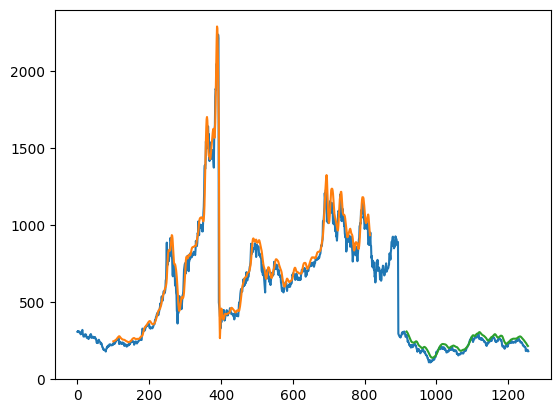

In [119]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [120]:
len(test_data)

440

In [125]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [126]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [127]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.04858028]
101
1 day input [0.07882102 0.07804661 0.07377091 0.07434351 0.07250839 0.06927463
 0.06419637 0.06518668 0.06383967 0.06214066 0.06490038 0.06670265
 0.06735034 0.06497078 0.07183723 0.07131626 0.07154155 0.07113792
 0.07299181 0.07269613 0.07076244 0.06712506 0.06843921 0.0688757
 0.06316382 0.05257081 0.04875977 0.04880201 0.05088588 0.04896158
 0.04583578 0.04655856 0.04189332 0.04352662 0.04578884 0.05181987
 0.05250041 0.05217657 0.05354235 0.05350949 0.04781639 0.05000821
 0.05426044 0.0606904  0.06323892 0.05889752 0.05923075 0.05984089
 0.0624692  0.05918851 0.05977049 0.06006618 0.06505996 0.06384906
 0.06194354 0.06135686 0.05983151 0.06130524 0.06161031 0.06314505
 0.06370826 0.06178396 0.06050266 0.06157276 0.0670922  0.06824209
 0.06757562 0.06998803 0.06525708 0.06871143 0.06779152 0.06970173
 0.07196865 0.0680919  0.065886   0.06585784 0.06117851 0.06093446
 0.06072795 0.06211719 0.05954052 0.05906179 0.05590782 0.05199822
 0.05247694 0.05043062 0.04870814 

In [128]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [129]:
import matplotlib.pyplot as plt

In [130]:
len(df1)

1257

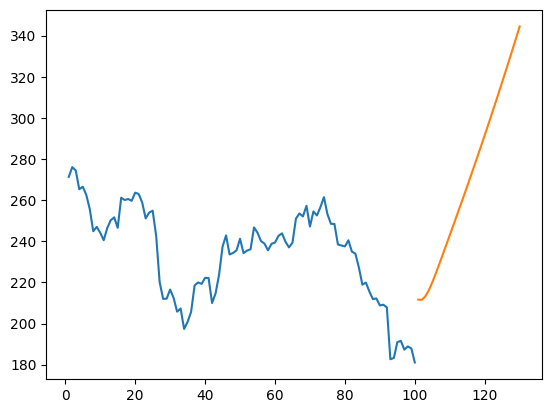

In [132]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

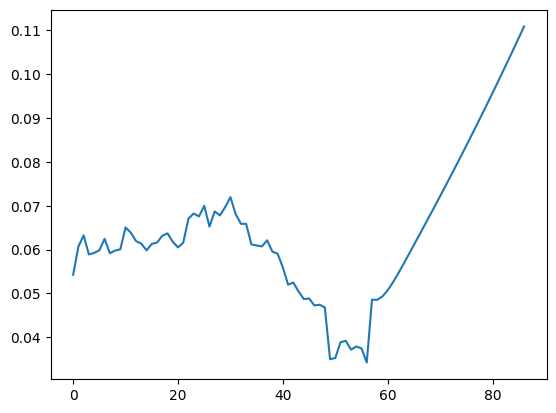

In [133]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [134]:
df3=scaler.inverse_transform(df3).tolist()

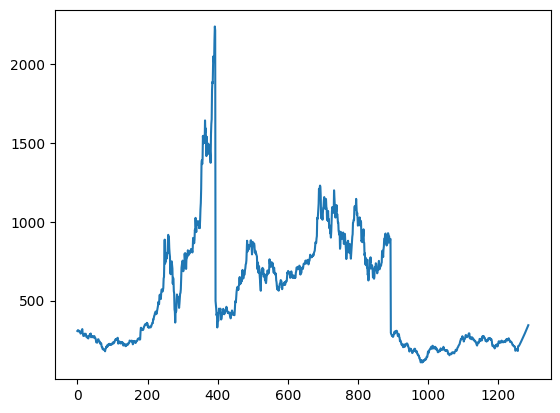

In [135]:
plt.plot(df3)